# **Exploratory Data Analysis**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data Loading

In [ ]:
# Function to safely load numpy files containing Python objects
def safe_load(file_path, allow_pickle=False):
    with open(file_path, 'rb') as f:
        return np.load(f, allow_pickle=allow_pickle)

# Loading the samples and labels with pickle allowed
samples = safe_load('/content/drive/MyDrive/Baseball bat/samples.npy', allow_pickle=True)
labels = safe_load('/content/drive/MyDrive/Baseball bat/labels.npy', allow_pickle=True)

# Verifying the shape and dtype of the arrays
print("Samples Shape:", samples.shape)



Samples Shape: (400,)


In [ ]:
print("Samples Data Type:", samples.dtype)
print("Labels Shape:", labels.shape)
print("Labels Data Type:", labels.dtype)

Samples Data Type: object
Labels Shape: (400,)
Labels Data Type: object


# Understanding the data

In [ ]:
# Display the first few entries of the samples and labels to understand their structure
print("First few samples entries:", samples[:5])
print("First few labels entries:", labels[:5])

# If the samples are images, visualize the first one
if samples.ndim == 4 and samples.shape[-1] in [1, 3]:  # checking for grayscale or RGB images
    plt.figure(figsize=(5, 5))
    plt.imshow(samples[0], cmap='gray' if samples.shape[-1] == 1 else None)
    plt.title(f'First Sample - Label: {labels[0]}')
    plt.colorbar()
    plt.show()
else:
    print("Sample data is not image data, or needs reshaping/adjustment.")


First few samples entries: [array([[[ 47,  54,  23],
         [ 56,  70,  34],
         [ 50,  66,  19],
         ...,
         [166, 192, 207],
         [ 59,  77,  65],
         [ 41,  38,  59]],

        [[ 55,  67,  27],
         [ 54,  64,  30],
         [ 54,  64,  27],
         ...,
         [169, 196, 207],
         [ 52,  73,  74],
         [ 49,  59,  68]],

        [[ 65,  65,  41],
         [ 55,  65,  28],
         [ 44,  61,  16],
         ...,
         [167, 189, 210],
         [ 44,  74,  66],
         [ 44,  54,  63]],

        ...,

        [[211, 160, 139],
         [210, 159, 138],
         [210, 159, 138],
         ...,
         [166, 143, 101],
         [171, 146, 105],
         [175, 150, 109]],

        [[212, 161, 140],
         [211, 160, 139],
         [211, 160, 139],
         ...,
         [161, 138,  96],
         [165, 142, 100],
         [167, 142, 101]],

        [[209, 158, 137],
         [212, 161, 140],
         [213, 162, 141],
         ...,
       

In [ ]:
# Check the shape of one sample to understand its structure
print("Example sample shape:", samples[0].shape)

# Flatten the samples data to 2D if they are indeed images (e.g., 32x32x3 image data)
if samples.ndim == 4:  # Assuming samples are in the format [num_samples, height, width, channels]
    num_samples, height, width, channels = samples.shape
    samples_flat = samples.reshape(num_samples, height * width * channels)
    samples_df = pd.DataFrame(samples_flat)
    print(samples_df.describe())
else:
    print("Samples are not in expected image format; check data structure")


Example sample shape: (425, 640, 3)
Samples are not in expected image format; check data structure


Since our samples contain images with the shape
(
425
,
640
,
3
)
(425,640,3) representing color images (425 pixels in height, 640 pixels in width, and 3 color channels), direct statistical summarization of this raw data as numerical arrays won't be very meaningful. Let's refine the approach by focusing on image-specific properties that can be analyzed, and ensure the labels visualization works correctly.

In [ ]:
# Initialize arrays to hold the computed statistics
mean_intensities = np.zeros((samples.shape[0], 3))  # one mean value per channel
std_intensities = np.zeros((samples.shape[0], 3))   # one std value per channel

# Compute mean and std dev for each image
for i in range(samples.shape[0]):
    mean_intensities[i, :] = samples[i].mean(axis=(0, 1))  # mean across height and width per channel
    std_intensities[i, :] = samples[i].std(axis=(0, 1))    # std across height and width per channel

# Create a DataFrame to summarize these statistics
stats_df = pd.DataFrame(data={
    'Mean_Red': mean_intensities[:, 0],
    'Mean_Green': mean_intensities[:, 1],
    'Mean_Blue': mean_intensities[:, 2],
    'Std_Red': std_intensities[:, 0],
    'Std_Green': std_intensities[:, 1],
    'Std_Blue': std_intensities[:, 2]
})

print(stats_df.describe())


         Mean_Red  Mean_Green   Mean_Blue     Std_Red   Std_Green    Std_Blue
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000
mean   115.120365  109.723319   91.563242   60.403917   54.498337   54.209717
std     23.557821   23.310197   27.833904   13.698600   13.945795   14.428108
min     21.254176   16.718533    6.790856   22.936677   16.955959   19.262559
25%     99.522715   95.337014   74.438134   51.563935   44.459478   43.575591
50%    117.059883  111.399143   90.482291   60.974066   54.236005   52.678826
75%    131.164212  125.502146  109.468142   69.732203   64.226289   63.437563
max    180.570880  180.517052  178.522742   97.630819   98.216464  102.633053


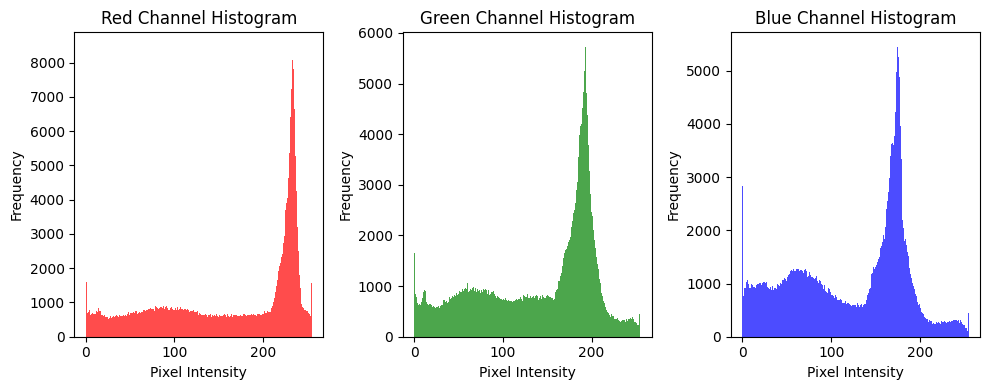

In [ ]:
# Select an example image
example_image = samples[0]

# Plotting the histogram of pixel intensities
plt.figure(figsize=(10, 4))
for i, color in enumerate(['Red', 'Green', 'Blue']):
    plt.subplot(1, 3, i+1)
    plt.hist(example_image[:, :, i].ravel(), bins=256, color=color.lower(), alpha=0.7)
    plt.title(f'{color} Channel Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
# Display unique elements in the labels array to understand its content
# Ensure labels are a flat array
labels_flat = labels.flatten() if labels.ndim > 1 else labels
# unique_labels = np.unique(labels_flat)
# print(f'Unique labels: {unique_labels}')
print(f'Type of the first label: {type(labels_flat[0])}')


Type of the first label: <class 'numpy.ndarray'>


In [ ]:
# Display the first few elements of labels_flat to understand its content
print("First few elements of labels_flat:")
for i in range(min(len(labels_flat), 10)):  # Display up to the first 10 elements
    print(f'Label {i}:', labels_flat[i])
    print(f'Type of label {i}:', type(labels_flat[i]))
    if isinstance(labels_flat[i], np.ndarray):
        print(f'Shape of label {i}:', labels_flat[i].shape)


First few elements of labels_flat:
Label 0: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Type of label 0: <class 'numpy.ndarray'>
Shape of label 0: (425, 640)
Label 1: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Type of label 1: <class 'numpy.ndarray'>
Shape of label 1: (457, 640)
Label 2: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Type of label 2: <class 'numpy.ndarray'>
Shape of label 2: (529, 640)
Label 3: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Type of label 3: <class 'numpy.ndarray'>
Shape of label 3: (480, 640)
Label 4: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Type of label 4: <class 'numpy.ndarray'>

The output above provided indicates that each label in labels_flat is itself a 2D numpy array with varying dimensions. These are likely masks or some form of spatial label data corresponding to each image sample.

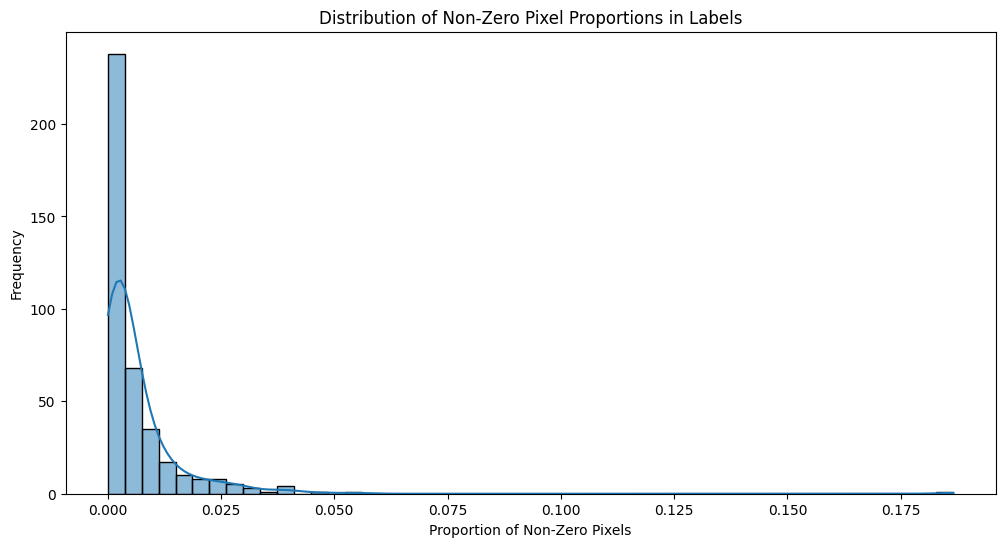

In [ ]:
# Calculate the proportion of non-zero pixels in each label mask
non_zero_proportions = np.array([np.sum(label > 0) / label.size for label in labels_flat])

# Plot the distribution of the non-zero proportions
plt.figure(figsize=(12, 6))
sns.histplot(non_zero_proportions, bins=50, kde=True)
plt.title('Distribution of Non-Zero Pixel Proportions in Labels')
plt.xlabel('Proportion of Non-Zero Pixels')
plt.ylabel('Frequency')
plt.show()


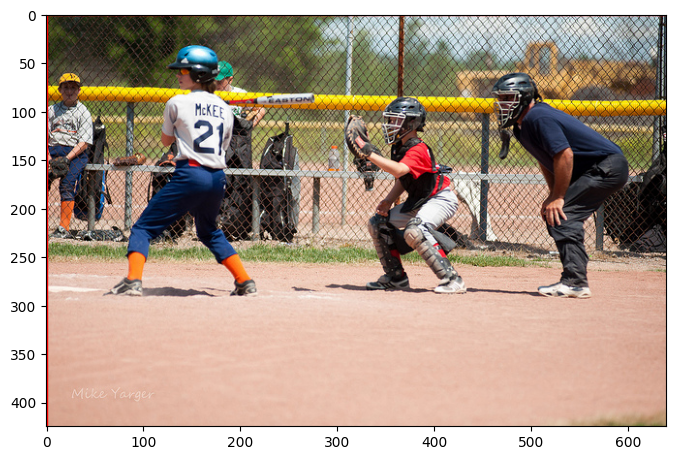

In [ ]:
import matplotlib.patches as patches

def display_image_with_mask(image, mask):
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(image)

    # Create a Rectangle patch
    mask_outline = patches.Rectangle((0,0), mask.shape[1], mask.shape[0],
                                     linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(mask_outline)

    plt.show()

# Example usage for the first image and mask
display_image_with_mask(samples[0], labels_flat[0])


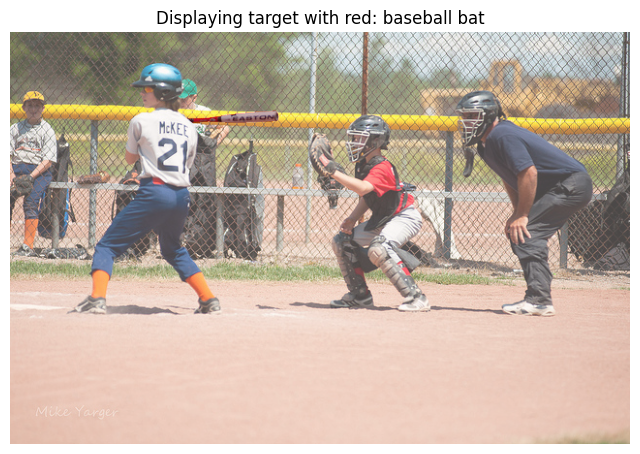

In [ ]:
def display_image_with_mask(image, mask, alpha=0.3, cmap='Reds'):
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.imshow(mask, cmap=cmap, alpha=alpha)  # Using the 'Reds' colormap for the mask
    plt.axis('off')
    plt.title("Displaying target with red: baseball bat")
    plt.show()

# Example of using the function with the first image and mask
display_image_with_mask(samples[0], labels_flat[0])


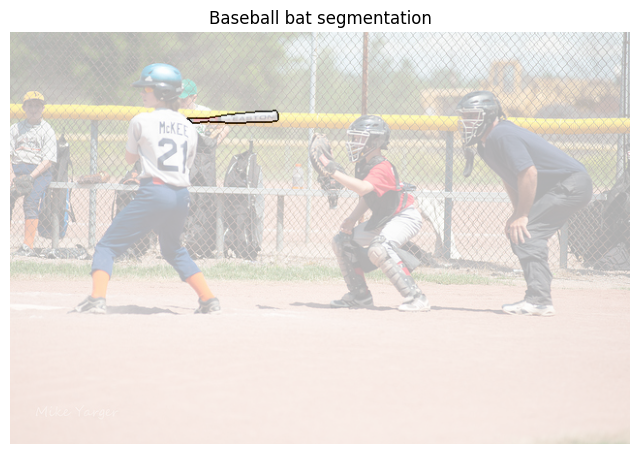

In [ ]:
from skimage.segmentation import find_boundaries

def display_image_with_mask_boundaries(image, mask):
    boundaries = find_boundaries(mask, mode='thick')
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.title("Baseball bat segmentation")
    plt.imshow(boundaries, cmap='Greys', alpha=0.7)  # Greys colormap for boundaries
    plt.axis('off')
    plt.show()

# Example of using the function with the first image and mask
display_image_with_mask_boundaries(samples[0], labels_flat[0])


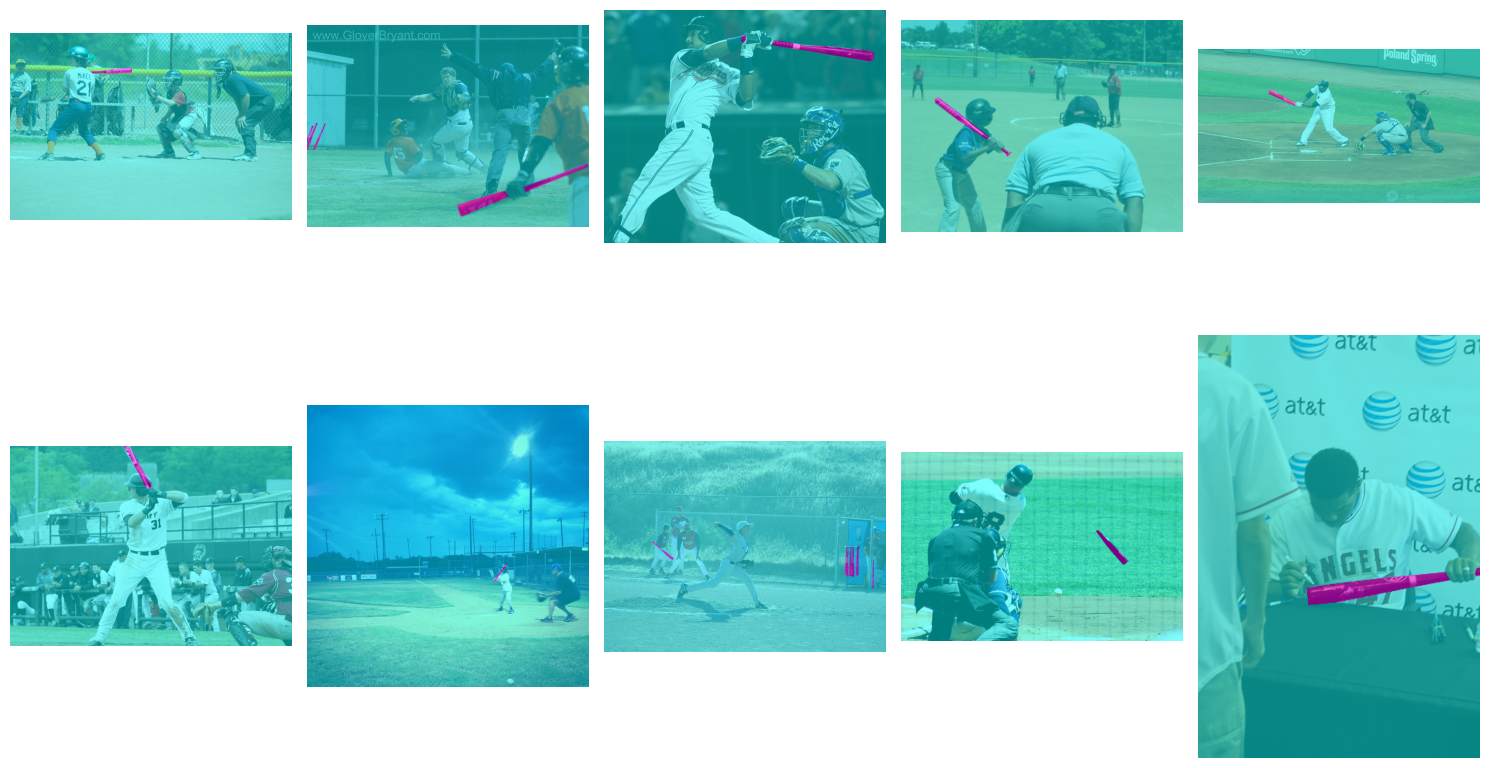

In [ ]:
def display_grid_of_images(images, masks, nrows, ncols, figsize=(15, 10)):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i])
            ax.imshow(masks[i], cmap='cool', alpha=0.5)  # Mask overlay
            ax.axis('off')
        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Example of using the function with the first 10 images and masks
display_grid_of_images(samples[:10], labels_flat[:10], nrows=2, ncols=5)


# Feature Extraction

In [ ]:
# Example of extracting simple color histograms as features
def extract_color_histogram(image, bins=32, channel_range=(0, 256)):
    # Extract 2D histograms from the RGB channels
    hist_r = np.histogram(image[:, :, 0], bins=bins, range=channel_range)[0]
    hist_g = np.histogram(image[:, :, 1], bins=bins, range=channel_range)[0]
    hist_b = np.histogram(image[:, :, 2], bins=bins, range=channel_range)[0]

    # Normalize the histograms
    hist_r = hist_r / np.sum(hist_r)
    hist_g = hist_g / np.sum(hist_g)
    hist_b = hist_b / np.sum(hist_b)

    # Concatenate histograms into a single feature vector
    hist_features = np.concatenate((hist_r, hist_g, hist_b))
    return hist_features

# Apply feature extraction to all images
features = np.array([extract_color_histogram(image) for image in samples])


# Preprocessing

In [ ]:
import cv2

# Define a common size for all images.
common_size = (256, 256)  # You can change this to whatever size you need for your model.

# Function to resize a list of images to a common size
def resize_images(image_list, size):
    resized_images = [cv2.resize(image, size, interpolation=cv2.INTER_NEAREST) for image in image_list]
    return np.array(resized_images)

# Resize the samples and the masks
samples_resized = resize_images(samples, common_size)
labels_resized = resize_images(labels_flat, common_size)


In [ ]:
# Normalize pixel values to the range [0, 1]
samples_normalized = samples_resized.astype('float32') / 255.0
labels_normalized = labels_resized.astype('float32')  # Assuming that masks are already 0 and 1.


# Image Augumentation for training

In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Multiply, BatchNormalization, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.utils import Sequence
from skimage.transform import resize
from tensorflow.keras.preprocessing.image import ImageDataGenerator

class ImageDataGeneratorCustom(Sequence):
    'Generates data for Keras'
    def __init__(self, images, masks, batch_size=32, dim=(256, 256), n_channels=3,
                 n_classes=1, shuffle=True, augment=False):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.images = images
        self.masks = masks
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.augment = augment
        self.on_epoch_end()
        if self.augment:
            self.augmentor = ImageDataGenerator(
                rotation_range=10,
                width_shift_range=0.1,
                height_shift_range=0.1,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest'
            )

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.images) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        # Find list of IDs
        list_IDs_temp = [k for k in indexes]
        # Generate data
        X, y = self.__data_generation(list_IDs_temp)
        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.images))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size, *self.dim, 1), dtype=int)  # Corrected shape for y

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            img = resize(self.images[ID], self.dim, mode='reflect', preserve_range=True)
            X[i,] = img / 255.0

            # Store class
            mask = resize(self.masks[ID], self.dim, mode='reflect', preserve_range=True)
            mask = (mask > 0.5).astype(int)
            y[i,] = np.expand_dims(mask, axis=-1)  # Add channel dimension to mask

            if self.augment:
                aug_dict = self.augmentor.get_random_transform(img.shape)
                X[i] = self.augmentor.apply_transform(X[i], aug_dict)
                y[i] = self.augmentor.apply_transform(y[i], aug_dict)

        return X, y


In [ ]:
import numpy as np
from skimage.transform import resize

def uniform_resize(data, shape=(256, 256)):
    """ Resize the images or masks in the dataset to a uniform size """
    resized_data = np.array([resize(image, shape, mode='constant', anti_aliasing=True) for image in data])
    return resized_data

# Load the data
X = samples
y = labels
# Check if X and y are lists or arrays of varying shapes
if isinstance(X[0], np.ndarray) and isinstance(y[0], np.ndarray):
    print("Data are numpy arrays. Checking shapes...")
    unique_shapes_x = set(img.shape for img in X)
    unique_shapes_y = set(mask.shape for mask in y)
    print(f"Unique shapes in X: {unique_shapes_x}")
    print(f"Unique shapes in Y: {unique_shapes_y}")

    if len(unique_shapes_x) > 1 or len(unique_shapes_y) > 1:
        print("Resizing images and masks to a uniform size...")
        X = uniform_resize(X)
        y = uniform_resize(y, shape=(256, 256))  # Ensure mask has the same size as images
else:
    print("Data are not in expected format, please check the dataset.")

# Normalize the images
X = X.astype('float32') / 255.0
y = y.astype('float32') / 255.0


Data are numpy arrays. Checking shapes...
Unique shapes in X: {(320, 640, 3), (479, 640, 3), (377, 500, 3), (304, 640, 3), (333, 640, 3), (480, 640, 3), (640, 427, 3), (612, 612, 3), (379, 640, 3), (406, 640, 3), (429, 640, 3), (640, 576, 3), (418, 500, 3), (408, 500, 3), (442, 640, 3), (319, 500, 3), (478, 640, 3), (640, 283, 3), (640, 404, 3), (460, 640, 3), (500, 380, 3), (508, 640, 3), (611, 640, 3), (361, 640, 3), (391, 408, 3), (421, 640, 3), (458, 640, 3), (283, 640, 3), (471, 640, 3), (461, 640, 3), (217, 256, 3), (500, 333, 3), (443, 640, 3), (640, 436, 3), (360, 640, 3), (640, 458, 3), (517, 640, 3), (594, 640, 3), (303, 500, 3), (456, 640, 3), (401, 640, 3), (640, 640, 3), (464, 640, 3), (454, 640, 3), (413, 640, 3), (334, 500, 3), (360, 243, 3), (353, 640, 3), (640, 598, 3), (640, 426, 3), (513, 640, 3), (381, 640, 3), (500, 338, 3), (410, 500, 3), (397, 640, 3), (424, 640, 3), (498, 640, 3), (346, 640, 3), (317, 500, 3), (493, 640, 3), (391, 500, 3), (640, 456, 3), (640, 5

KeyboardInterrupt: 

In [ ]:
from skimage.transform import resize

def uniform_resize(data, shape=(256, 256)):
    """ Resize images or masks to a uniform size """
    resized = np.array([resize(item, shape, mode='constant', preserve_range=True, anti_aliasing=True) for item in data])
    return resized.astype(np.uint8)  # Convert to unsigned byte format

# Assuming `X` and `y` are loaded as lists of varying-sized images and masks
X_resized = uniform_resize(X, shape=(256, 256, 3))  # for RGB images
y_resized = uniform_resize(y, shape=(256, 256))     # for binary masks, assuming y is already binary (0 and 255)

# Normalize the images
X_resized = X_resized.astype('float32') / 255.0
y_resized = y_resized.astype('float32') / 255.0


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate

def simple_unet(input_size=(256, 256, 3)):
    inputs = Input(input_size)
    # Encoder
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    p1 = MaxPooling2D((2, 2))(c1)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    p2 = MaxPooling2D((2, 2))(c2)
    # Bottleneck
    c5 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    # Decoder
    u6 = UpSampling2D((2, 2))(c5)
    c6 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    u7 = UpSampling2D((2, 2))(c6)
    c7 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c7)
    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Initialize model
model = simple_unet()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resized, y_resized, test_size=0.1, random_state=42)

# Train model
results = model.fit(X_train, y_train, validation_split=0.1, epochs=5, batch_size=8, verbose=2)


Epoch 1/5
41/41 - 103s - loss: 0.6663 - accuracy: 1.0000 - val_loss: 0.6561 - val_accuracy: 1.0000 - 103s/epoch - 3s/step
Epoch 2/5
41/41 - 94s - loss: 0.6468 - accuracy: 1.0000 - val_loss: 0.6370 - val_accuracy: 1.0000 - 94s/epoch - 2s/step
Epoch 3/5
41/41 - 94s - loss: 0.6280 - accuracy: 1.0000 - val_loss: 0.6185 - val_accuracy: 1.0000 - 94s/epoch - 2s/step
Epoch 4/5
41/41 - 93s - loss: 0.6098 - accuracy: 1.0000 - val_loss: 0.6005 - val_accuracy: 1.0000 - 93s/epoch - 2s/step
Epoch 5/5
41/41 - 93s - loss: 0.5921 - accuracy: 1.0000 - val_loss: 0.5831 - val_accuracy: 1.0000 - 93s/epoch - 2s/step


In [ ]:
def visualize_results(X, y_true, model, indices=[0]):
    preds = model.predict(X)
    fig, axes = plt.subplots(len(indices), 3, figsize=(15, 5 * len(indices)))
    for i, idx in enumerate(indices):
        axes[i, 0].imshow(X[idx])
        axes[i, 0].set_title('Original Image')
        axes[i, 0].axis('off')

        axes[i, 1].imshow(y_true[idx].squeeze(), cmap='gray')
        axes[i, 1].set_title('Ground Truth Mask')
        axes[i, 1].axis('off')

        axes[i, 2].imshow(preds[idx].squeeze(), cmap='gray')
        axes[i, 2].set_title('Predicted Mask')
        axes[i, 2].axis('off')
    plt.show()

# Visualize results for some sample indices
visualize_results(X_test, y_test, model, indices=[0, 1, 2, 3, 4])



In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Assuming you have loaded the images and masks
# # For demonstration, replace these with your actual data paths
# X = np.load('path/to/samples.npy', allow_pickle=True)
# y = np.load('path/to/labels.npy', allow_pickle=True)

# Reshape and normalize if necessary
# [...]

# Let's inspect some statistics about the images and masks to understand the data
print(f"Image data type: {X.dtype}, min: {X.min()}, max: {X.max()}")
print(f"Mask data type: {y.dtype}, min: {y.min()}, max: {y.max()}")

# Choose an index to visualize
index_to_visualize = 0

# Now, let's visualize again but with a check for data validity
def visualize_sample(image, mask, title):
    if image is None or np.all(image == 0):
        print(f"No data to show for {title}")
        return

    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    if mask is not None and not np.all(mask == 0):
        plt.imshow(mask, cmap='jet', alpha=0.5, vmin=0, vmax=255)  # Adjust alpha for mask transparency
    plt.title(title)
    plt.axis('off')
    plt.show()

# Visualize the original image, ground truth mask, and predicted mask
visualize_sample(X[index_to_visualize], None, "Original Image")
visualize_sample(None, y[index_to_visualize], "Ground Truth Mask")
# visualize_sample(None, predicted_mask, "Predicted Mask")  # Uncomment and replace with predicted mask if available



In [ ]:
X = samples
y = labels

#

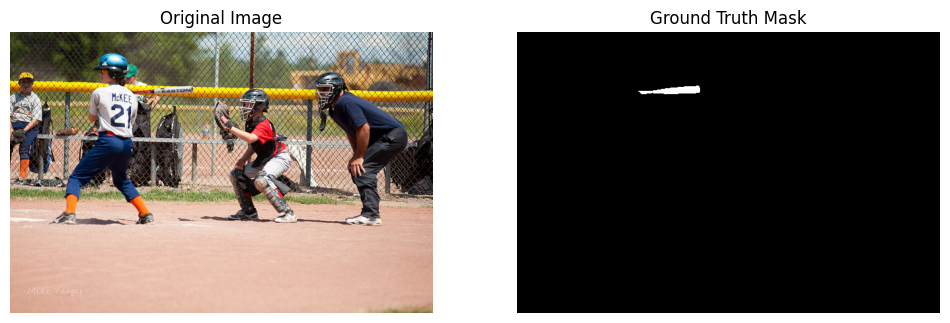

In [ ]:
import numpy as np

# Assuming X is a list of arrays, we need to find the global maximum
max_value = max(np.max(image) for image in X)

# If the maximum value is greater than 1, then we can assume the images are not normalized
# Otherwise, we leave them as they are
if max_value > 1.0:
    # Normalize each image individually
    X_normalized = [image.astype('float32') / 255.0 for image in X]
else:
    X_normalized = X

# Do the same for masks
max_value = max(np.max(mask) for mask in y)

# Normalize if needed
if max_value > 1.0:
    y_normalized = [mask.astype('float32') / 255.0 for mask in y]
else:
    y_normalized = y

# Now let's plot one sample to check
def plot_sample(X, y, index):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(X[index])
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(y[index], cmap='gray')
    plt.title('Ground Truth Mask')
    plt.axis('off')

    plt.show()

# Plot the first image and mask
plot_sample(X_normalized, y_normalized, 0)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define a simple U-Net model
def simple_unet(input_size=(256, 256, 3)):
    inputs = Input(input_size)
    # Encoder
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    p1 = MaxPooling2D((2, 2))(c1)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    p2 = MaxPooling2D((2, 2))(c2)

    # Bottleneck
    c5 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)

    # Decoder
    u6 = UpSampling2D((2, 2))(c5)
    c6 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    u7 = UpSampling2D((2, 2))(c6)
    c7 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c7)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Load and preprocess your data here
# X_resized = [...]
# y_resized = [...]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resized, y_resized, test_size=0.1, random_state=42)

# Initialize model
model = simple_unet()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for early stopping and model checkpoints
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('model-best.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

# Train the model
results = model.fit(X_train, y_train, validation_split=0.1, epochs=5, batch_size=8, verbose=2, callbacks=callbacks)

# After training, load the best model
model.load_weights('model-best.h5')

# Define a function to visualize the results
def visualize_results(X, y_true, model, indices=[0]):
    preds = model.predict(X)
    fig, axes = plt.subplots(len(indices), 3, figsize=(15, 5 * len(indices)))
    for i, idx in enumerate(indices):
        axes[i, 0].imshow(X[idx])
        axes[i, 0].set_title('Original Image')
        axes[i, 0].axis('off')

        axes[i, 1].imshow(y_true[idx].squeeze(), cmap='gray')
        axes[i, 1].set_title('Ground Truth Mask')
        axes[i, 1].axis('off')

        axes[i, 2].imshow(preds[idx].squeeze(), cmap='gray')
        axes[i, 2].set_title('Predicted Mask')
        axes[i, 2].axis('off')
    plt.show()

# Visualize results for some sample indices
visualize_results(X_test, y_test, model, indices=[0, 1, 2, 3, 4])


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [ ]:
print("Image sample data:", X_train[0].min(), X_train[0].max(), X_train[0].shape)
print("Mask sample data:", y_train[0].min(), y_train[0].max(), y_train[0].shape)


Image sample data: 0.0 0.0 (256, 256, 3)
Mask sample data: 0.0 0.0 (256, 256)


In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(X_train[0])
plt.title('Sample Training Image')

plt.subplot(1, 2, 2)
plt.imshow(y_train[0].squeeze(), cmap='gray')
plt.title('Sample Training Mask')
plt.show()


In [ ]:
train_preds = model.predict(X_train[:5])
for i, pred in enumerate(train_preds):
    plt.imshow(pred.squeeze(), cmap='gray')
    plt.title(f'Sample Training Prediction {i}')
    plt.show()


In [ ]:
# Example thresholding
pred_thresholded = (train_preds[0].squeeze() > 0.5).astype(np.uint8)
plt.imshow(pred_thresholded, cmap='gray')
plt.title('Thresholded Prediction')
plt.show()


Original image data range: 0 to 255
Original mask data range: 0 to 1


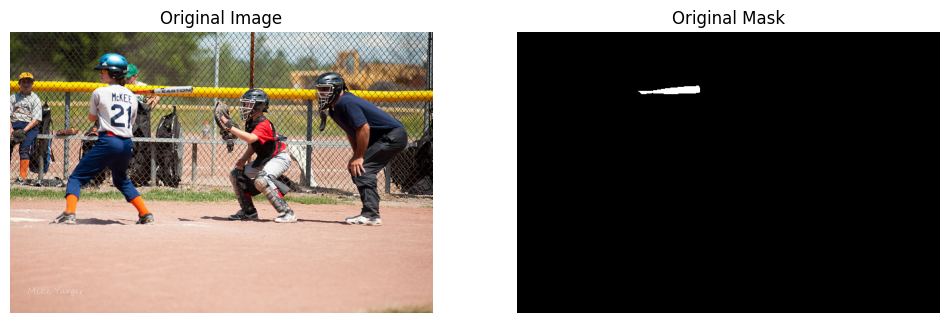

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the original data
X_original = samples
y_original = labels

# Pick an index to visualize
index = 0

# Verify that data is correctly loaded
print(f"Original image data range: {X_original[index].min()} to {X_original[index].max()}")
print(f"Original mask data range: {y_original[index].min()} to {y_original[index].max()}")

# Visualize the original data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(X_original[index], cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(y_original[index], cmap='gray')
plt.title('Original Mask')
plt.axis('off')

plt.show()


In [ ]:
# Normalize the images only, not the masks
X_normalized = np.array([x / 255. for x in X_original], dtype=np.float32)

# Assuming X_original contains the original images and y_original contains the original masks
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_original, test_size=0.1, random_state=42)

# Proceed with model training using X_train and y_train
# [...]

# After training, visualize the results including the predicted mask
def visualize_results(X, y_true, model, indices=[0]):
    preds = model.predict(X)
    fig, axes = plt.subplots(len(indices), 3, figsize=(20, 5 * len(indices)))
    for i, idx in enumerate(indices):
        axes[i, 0].imshow(X[idx])
        axes[i, 0].set_title('Original Image')
        axes[i, 0].axis('off')

        axes[i, 1].imshow(y_true[idx].squeeze(), cmap='gray')
        axes[i, 1].set_title('Original Mask')
        axes[i, 1].axis('off')

        # If the predictions are close to 0 or 1, it may be helpful to apply thresholding
        # to see the segmentation result more clearly
        prediction = preds[idx].squeeze()
        prediction_thresholded = (prediction > 0.5).astype(np.float32)

        axes[i, 2].imshow(prediction_thresholded, cmap='gray')
        axes[i, 2].set_title('Predicted Mask')
        axes[i, 2].axis('off')
    plt.show()

# Visualize results for some sample indices
visualize_results(X_test, y_test, model, indices=[0, 1, 2, 3, 4])


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (400,) + inhomogeneous part.

In [ ]:
# Normalize the images only, not the masks
X_normalized = [x.astype(np.float32) / 255. for x in X_original]

# Split data into train and test sets using lists
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_original.tolist(), test_size=0.1, random_state=42)


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Multiply, Activation, BatchNormalization
from tensorflow.keras.models import Model

def conv_block(input_tensor, num_filters):
    """Function to add two convolutional layers with the parameters passed to it"""
    x = Conv2D(num_filters, (3, 3), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(num_filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def sam_block(input_tensor, num_filters):
    """Spatial Attention Module"""
    sam = Conv2D(num_filters, (1, 1), activation='sigmoid')(input_tensor)
    return Multiply()([input_tensor, sam])

def unet_with_sam(input_size=(256, 256, 3), num_classes=1):
    inputs = Input(input_size)

    c1 = conv_block(inputs, 16)  # Reduce number of filters
    p1 = MaxPooling2D((2, 2))(c1)
    l1 = sam_block(c1, 16)  # Reduce number of filters

    c2 = conv_block(p1, 32)  # Reduce number of filters
    p2 = MaxPooling2D((2, 2))(c2)
    l2 = sam_block(c2, 32)  # Reduce number of filters

    c3 = conv_block(p2, 64)  # Reduce number of filters
    p3 = MaxPooling2D((2, 2))(c3)
    l3 = sam_block(c3, 64)  # Reduce number of filters

    u6 = UpSampling2D((2, 2))(l3)
    u6 = concatenate([u6, l2])
    c6 = conv_block(u6, 32)  # Reduce number of filters

    u7 = UpSampling2D((2, 2))(c6)
    u7 = concatenate([u7, l1])
    c7 = conv_block(u7, 16)  # Reduce number of filters

    outputs = Conv2D(num_classes, (1, 1), activation='sigmoid' if num_classes == 1 else 'softmax')(c7)
    model = Model(inputs=[inputs], outputs=[outputs])

    return model

# Create the model
model = unet_with_sam()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 256, 256, 16)         64        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 256, 256, 16)         0         ['batch_normalization[0][0

In [ ]:
batch_size = 8  # Smaller batch size to reduce memory usage


In [ ]:
from tensorflow.keras.utils import Sequence
from skimage.transform import resize
import numpy as np

class EfficientDataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size=8, dim=(256, 256), shuffle=True):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.dim = dim
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.x) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        X, y = self.__data_generation(indexes)
        return X, y

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.x))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, indexes):
        X = np.empty((self.batch_size, *self.dim, 3))
        y = np.empty((self.batch_size, *self.dim, 1))

        for i, ID in enumerate(indexes):
            img = resize(self.x[ID], self.dim, mode='reflect', preserve_range=True)
            mask = resize(self.y[ID], self.dim, mode='reflect', preserve_range=True)

            X[i,] = img / 255.0
            y[i,] = (mask > 0.5).astype(int)

        return X, y


In [ ]:
import gc
from tensorflow.keras.backend import clear_session

# After each epoch or training session
clear_session()
gc.collect()


625

In [ ]:
from tensorflow.keras import mixed_precision

# Set up mixed precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)


The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


In [ ]:
import cv2

# Define a common size for all images.
common_size = (128,128)  # You can change this to whatever size you need for your model.

# Function to resize a list of images to a common size
def resize_image(image_list, size):
    resized_images = [cv2.resize(image, size, interpolation=cv2.INTER_NEAREST) for image in image_list]
    return np.array(resized_images)

In [ ]:
class ImageDataGeneratorCustom(Sequence):
    def __init__(self, images, masks, batch_size=32, dim=(128, 128), n_channels=3,
                 n_classes=1, shuffle=True, augment=False):
        self.dim = dim
        self.batch_size = batch_size
        self.images = images
        self.masks = masks
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.augment = augment
        self.on_epoch_end()
        if augment:
            self.augmentor = ImageDataGenerator(
                rotation_range=10,
                width_shift_range=0.1,
                height_shift_range=0.1,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest'
            )

    def __len__(self):
        return int(np.ceil(len(self.images) / self.batch_size))

    def __getitem__(self, index):
        indices = slice(index * self.batch_size, (index + 1) * self.batch_size)
        X, y = self.__data_generation(indices)
        return X, y

    def on_epoch_end(self):
        self.indices = np.arange(len(self.images))
        if self.shuffle:
            np.random.shuffle(self.indices)

    def resize_image(self, image, target_size=(128, 128)):
        return resize(image, target_size, anti_aliasing=True)

    def __data_generation(self, indices):
        X = np.empty((self.batch_size, *self.dim, self.n_channels), dtype=np.float32)
        y = np.empty((self.batch_size, *self.dim, 1), dtype=np.float32)

        for i, idx in enumerate(self.indices[indices]):
            img = self.resize_image(self.images[idx], self.dim)
            mask = self.resize_image(self.masks[idx], self.dim)

            X[i,] = img / 255.0
            y[i,] = np.expand_dims((mask > 0.5).astype(np.float32), axis=-1)

            if self.augment:
                params = self.augmentor.get_random_transform(img.shape)
                X[i] = self.augmentor.apply_transform(X[i], params)
                y[i] = self.augmentor.apply_transform(y[i], params)

        return X, y


In [ ]:
# Create an instance of the data generator
sample_generator = ImageDataGeneratorCustom(images=samples, masks=labels, batch_size=10, dim=(256, 256), augment=False)

# Generate one batch of data
X_batch, y_batch = sample_generator.__getitem__(0)

# Check shapes
print("Shape of X_batch:", X_batch.shape)  # Expected shape: (10, 256, 256, 3)
print("Shape of y_batch:", y_batch.shape)  # Expected shape: (10, 256, 256, 1)


Shape of X_batch: (10, 256, 256, 3)
Shape of y_batch: (10, 256, 256, 1)


In [ ]:
# Assuming you have 'samples.npy' and 'labels.npy' loaded as samples and labels
from sklearn.model_selection import train_test_split

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(samples, labels, test_size=0.1, random_state=42)

train_gen = EfficientDataGenerator(X_train, y_train, batch_size=8, dim=(256, 256))
val_gen = EfficientDataGenerator(X_val, y_val, batch_size=8, dim=(256, 256))

# Setup model
model = unet_with_sam(input_size=(256, 256, 3), num_classes=1)

# Compile the model with mixed precision
policy = mixed_precision.Policy('mixed_float16')
from tensorflow.keras import mixed_precision

# Setting up mixed precision
mixed_precision.set_global_policy('mixed_float16')

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# # Assuming the model is defined and compiled as previously described
# history = model.fit(
#     sample_generator,
#     epochs=10,
#     verbose=1
# )


Epoch 1/10


In [ ]:
from PIL import Image

def resize_images(images, new_size=(512, 512)):
    resized = np.array([np.array(Image.fromarray(img).resize(new_size, Image.BILINEAR)) for img in images])
    return resized

samples_resized = resize_images(samples)


In [ ]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 9.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from ultralytics import SAM

# Initialize SAM
model = SAM('sam_b.pt')  # Ensure that the model path is correct

# Example to run inference on the first image
result = model(samples_resized[0])
# result.show()


100%|██████████| 358M/358M [00:05<00:00, 67.5MB/s]



0: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 1 20, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 28, 1 29, 1 30, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 1 39, 1 40, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 1 48, 1 49, 1 50, 1 51, 1 52, 1 53, 911514.6ms
Speed: 47.7ms preprocess, 911514.6ms inference, 385.1ms postprocess per image at shape (1, 3, 1024, 1024)


AttributeError: 'list' object has no attribute 'show'

In [ ]:
print(type(result))
print(len(result))
if len(result) > 0:
    print(type(result[0]))
    print(result[0].keys())  # If the result is a dictionary, check its keys


<class 'list'>
1
<class 'ultralytics.engine.results.Results'>


AttributeError: 'Results' object has no attribute 'keys'. See valid attributes below.

    A class for storing and manipulating inference results.

    Attributes:
        orig_img (numpy.ndarray): Original image as a numpy array.
        orig_shape (tuple): Original image shape in (height, width) format.
        boxes (Boxes, optional): Object containing detection bounding boxes.
        masks (Masks, optional): Object containing detection masks.
        probs (Probs, optional): Object containing class probabilities for classification tasks.
        keypoints (Keypoints, optional): Object containing detected keypoints for each object.
        speed (dict): Dictionary of preprocess, inference, and postprocess speeds (ms/image).
        names (dict): Dictionary of class names.
        path (str): Path to the image file.

    Methods:
        update(boxes=None, masks=None, probs=None, obb=None): Updates object attributes with new detection results.
        cpu(): Returns a copy of the Results object with all tensors on CPU memory.
        numpy(): Returns a copy of the Results object with all tensors as numpy arrays.
        cuda(): Returns a copy of the Results object with all tensors on GPU memory.
        to(*args, **kwargs): Returns a copy of the Results object with tensors on a specified device and dtype.
        new(): Returns a new Results object with the same image, path, and names.
        plot(...): Plots detection results on an input image, returning an annotated image.
        show(): Show annotated results to screen.
        save(filename): Save annotated results to file.
        verbose(): Returns a log string for each task, detailing detections and classifications.
        save_txt(txt_file, save_conf=False): Saves detection results to a text file.
        save_crop(save_dir, file_name=Path("im.jpg")): Saves cropped detection images.
        tojson(normalize=False): Converts detection results to JSON format.
    

In [ ]:
# Assuming 'result' is the output from the SAM model and contains only one Results object
results = result[0]

# Accessing attributes
if hasattr(results, 'masks'):
    masks = results.masks.numpy()  # Assuming masks are stored and need to be converted to numpy arrays
    print("Masks are available.")
else:
    print("No masks are available.")

if hasattr(results, 'boxes'):
    boxes = results.boxes.numpy()  # Convert bounding boxes to numpy array if present
    print("Bounding boxes are available.")
else:
    print("No bounding boxes are available.")


Masks are available.
Bounding boxes are available.


In [ ]:
# Print shapes and types of masks and bounding boxes to understand what's being passed to the function
if hasattr(results, 'masks') and results.masks is not None:
    print("Masks shape:", results.masks.shape)
    print("Masks type:", type(results.masks))
    masks = results.masks.numpy() if not isinstance(results.masks, np.ndarray) else results.masks

if hasattr(results, 'boxes') and results.boxes is not None:
    print("Boxes shape:", results.boxes.shape)
    print("Boxes type:", type(results.boxes))
    boxes = results.boxes.numpy() if not isinstance(results.boxes, np.ndarray) else results.boxes


Masks shape: torch.Size([54, 512, 512])
Masks type: <class 'ultralytics.engine.results.Masks'>
Boxes shape: torch.Size([54, 6])
Boxes type: <class 'ultralytics.engine.results.Boxes'>


In [ ]:
# Convert Masks
if hasattr(results, 'masks') and results.masks is not None:
    masks_np = results.masks.numpy()  # This method should already handle necessary conversions

# Convert Boxes
if hasattr(results, 'boxes') and results.boxes is not None:
    boxes_np = results.boxes.numpy()  # As with masks, this method handles the conversion


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def display_image_with_masks_and_boxes(image, masks=None, boxes=None):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='gray')  # Display the grayscale image
    ax = plt.gca()

    if masks is not None:
        # Assuming masks is a list of mask arrays
        for mask in masks:
            plt.imshow(mask, cmap='gray', alpha=0.5)  # Overlay mask with some transparency

    if boxes is not None:
        # Assuming box format is [class, x1, y1, x2, y2, confidence]
        for box in boxes:
            rect = patches.Rectangle((box[1], box[2]), box[3] - box[1], box[4] - box[2], linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

    plt.axis('off')
    plt.show()


In [ ]:
if hasattr(results, 'orig_img'):
    # Convert to numpy if it's a tensor and adjust dimensions if necessary
    if isinstance(results.orig_img, torch.Tensor):
        image_np = results.orig_img.cpu().numpy() if results.orig_img.is_cuda else results.orig_img.numpy()
        if image_np.ndim == 3:
            image_np = np.transpose(image_np, (1, 2, 0))  # CHW to HWC
        if image_np.shape[2] == 1:
            image_np = image_np.squeeze(2)  # Remove single-color channel dimensions for grayscale
    else:
        image_np = results.orig_img  # If it's already a numpy array

    display_image_with_masks_and_boxes(image_np, masks_np, boxes_np)


In [ ]:
# Convert Masks and Boxes correctly
if hasattr(results, 'masks') and results.masks is not None:
    masks_np = results.masks.numpy()  # Convert to numpy array
    if isinstance(masks_np, np.ndarray) and masks_np.ndim == 3:
        print("Masks are numpy arrays and ready for use.")
    else:
        print("Masks might require additional processing.")

if hasattr(results, 'boxes') and results.boxes is not None:
    boxes_np = results.boxes.numpy()  # Convert to numpy array
    if isinstance(boxes_np, np.ndarray) and boxes_np.ndim == 2:
        print("Boxes are numpy arrays and ready for use.")
    else:
        print("Boxes might require additional processing.")


Masks might require additional processing.
Boxes might require additional processing.


In [ ]:
results

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10', 11: '11', 12: '12', 13: '13', 14: '14', 15: '15', 16: '16', 17: '17', 18: '18', 19: '19', 20: '20', 21: '21', 22: '22', 23: '23', 24: '24', 25: '25', 26: '26', 27: '27', 28: '28', 29: '29', 30: '30', 31: '31', 32: '32', 33: '33', 34: '34', 35: '35', 36: '36', 37: '37', 38: '38', 39: '39', 40: '40', 41: '41', 42: '42', 43: '43', 44: '44', 45: '45', 46: '46', 47: '47', 48: '48', 49: '49', 50: '50', 51: '51', 52: '52', 53: '53'}
obb: None
orig_img: array([[[ 49,  58,  26],
        [ 53,  68,  28],
        [ 53,  71,  19],
        ...,
        [ 80,  86, 103],
        [104, 125, 124],
        [ 46,  48,  61]],

       [[ 53,  64,  27],
        [ 54,  65,  29],
        [ 53,  67,  24],
        ...,
        [ 85,  93, 102],
    

In [ ]:
# Masks are already numpy arrays
if hasattr(results, 'masks') and results.masks is not None:
    masks_np = results.masks.xy  # Directly using numpy arrays
    print(f"Using {len(masks_np)} pre-converted masks.")

# Assuming boxes are directly accessible and properly formatted
if hasattr(results, 'boxes') and results.boxes is not None:
    boxes_np = results.boxes.xyxy # Directly using numpy arrays if already correct format
    print(f"Using {len(boxes_np)} pre-converted boxes.")


Using 54 pre-converted masks.
Using 54 pre-converted boxes.


In [ ]:
# Convert Masks to numpy array
if hasattr(results, 'masks') and results.masks is not None:
    masks_np = results.masks.numpy()  # Convert to numpy array if not already
    print(f"Converted masks to numpy arrays. Number of masks: {len(masks_np)}")

# Convert Boxes to numpy array using the correct attribute
if hasattr(results, 'boxes') and results.boxes is not None:
    boxes_np = results.boxes.xyxy.numpy()  # This will convert box data to numpy array
    print(f"Converted boxes to numpy arrays. Number of boxes: {len(boxes_np)}")


Converted masks to numpy arrays. Number of masks: 54
Converted boxes to numpy arrays. Number of boxes: 54


In [ ]:
# Extract and Convert Masks to numpy array manually if possible
if hasattr(results, 'masks') and results.masks is not None:
    # Convert each segment in the list to a numpy array
    masks_np = [np.array(segment) for segment in results.masks.xy] if results.masks.xy else []
    print(f"Converted {len(masks_np)} masks segments to numpy arrays.")
else:
    masks_np = []

# For boxes, ensure we use the .numpy() method correctly
if hasattr(results, 'boxes') and results.boxes is not None:
    boxes_np = results.boxes.xyxy.numpy()  # Assuming xyxy gives us the [x1, y1, x2, y2] format
    print("Boxes converted to numpy array with shape:", boxes_np.shape)
else:
    boxes_np = np.array([])


Converted 54 masks segments to numpy arrays.
Boxes converted to numpy array with shape: (54, 4)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def display_image_with_masks_and_boxes(image, masks=None, boxes=None, names=None):
    plt.figure(figsize=(12, 8))
    plt.imshow(image)  # Display the RGB image
    ax = plt.gca()

    if masks is not None:
        for mask in masks:
            if isinstance(mask, np.ndarray) and mask.ndim == 2:
                plt.imshow(mask, cmap='gray', alpha=0.5)  # Overlay mask with transparency

    if boxes is not None:
        for box in boxes:
            if box.size == 6:
                x1, y1, x2, y2, conf, cls_id = box
                label = names.get(cls_id, str(cls_id)) if names and cls_id in names else str(cls_id)
                rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='red', facecolor='none')
                ax.add_patch(rect)
                plt.text(x1, y1, f'{label} ({conf:.2f})', color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

    plt.axis('off')
    plt.show()



# Display the results using the original image and the processed masks and boxes
display_image_with_masks_and_boxes(results.orig_img, masks_np, boxes_np, results.names)


In [ ]:
def ensure_uniform_array(data):
    if isinstance(data, list):
        # Assuming the list should contain similar shape arrays, stack them into a uniform numpy array
        return np.stack(data)
    return data

masks_np = ensure_uniform_array(masks_np)
boxes_np = ensure_uniform_array(boxes_np)


In [ ]:
def display_image_with_masks_and_boxes(image, masks=None, boxes=None):
    plt.figure(figsize=(12, 8))
    plt.imshow(image, cmap='gray')  # Assuming the image is grayscale
    ax = plt.gca()

    if masks is not None:
        # Iterate through each mask
        for mask in masks:
            if mask.ndim == 2:  # Ensure mask is 2D
                plt.imshow(mask, cmap='gray', alpha=0.5)  # Overlay mask with transparency

    if boxes is not None:
        # Iterate through each box
        for box in boxes:
            # Ensure box has 6 elements [class, x1, y1, x2, y2, confidence]
            if len(box) == 6:
                rect = patches.Rectangle((box[1], box[2]), box[3] - box[1], box[4] - box[2], linewidth=2, edgecolor='red', facecolor='none')
                ax.add_patch(rect)

    plt.axis('off')
    plt.show()


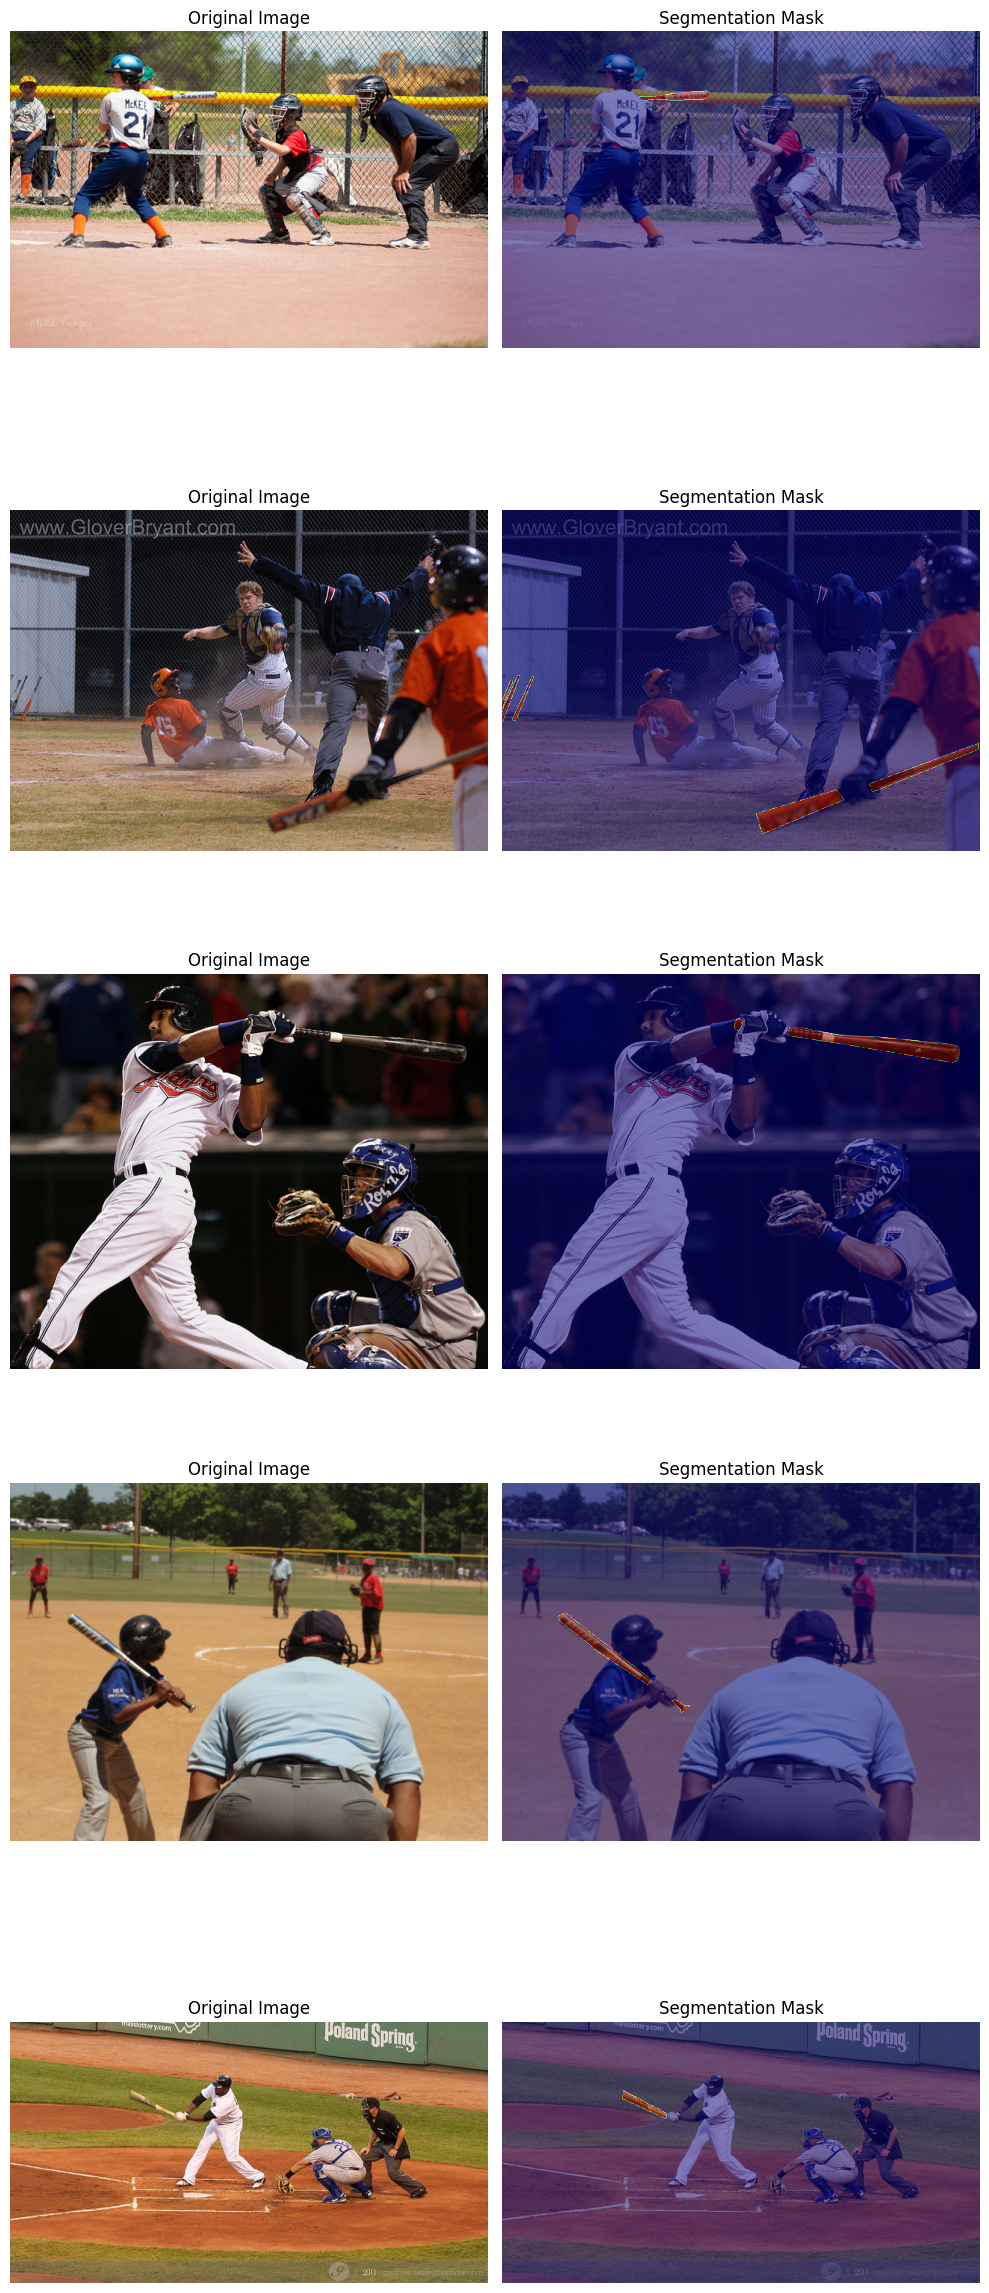

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the images and labels
# samples = np.load('samples.npy', allow_pickle=True)
# labels = np.load('labels.npy', allow_pickle=True)

# Check if loaded data are lists or arrays and convert lists to arrays
if isinstance(samples, list):
    samples = np.array(samples)
if isinstance(labels, list):
    labels = np.array(labels)

# Visualization function for a subset of images
def overlay_masks(images, masks, num_samples=5):
    # Select a subset of images and masks
    images_subset = images[:num_samples]
    masks_subset = masks[:num_samples]

    # Determine layout for plotting
    num_images = len(images_subset)
    fig, axs = plt.subplots(nrows=num_images, ncols=2, figsize=(10, num_images * 5))

    # Flatten the axes array for easy indexing
    axs = axs.ravel() if num_images > 1 else [axs]

    for i, (image, mask) in enumerate(zip(images_subset, masks_subset)):
        # Plot the image
        ax_image = axs[i * 2] if num_images > 1 else axs[0]
        ax_image.imshow(image, cmap='gray')
        ax_image.axis('off')
        ax_image.set_title('Original Image')

        # Plot the mask
        ax_mask = axs[i * 2 + 1] if num_images > 1 else axs[1]
        ax_mask.imshow(image, cmap='gray')
        ax_mask.imshow(mask, cmap='jet', alpha=0.5)  # Overlay mask
        ax_mask.axis('off')
        ax_mask.set_title('Segmentation Mask')

    plt.tight_layout()
    plt.show()

# Use the function to overlay masks on images
overlay_masks(samples, labels)


In [ ]:
# Assuming samples is a numpy array of images [num_images, height, width, channels]
predicted_masks = []
for image in samples:
    # Run SAM model prediction
    # results = model(image)
    # Convert results to a numpy mask here if necessary, e.g., results.masks.numpy()
    predicted_masks.append(results.masks)

# Convert the list of masks to a numpy array for visualization
predicted_masks = np.array(predicted_masks)

In [ ]:
ground_truth_masks = np.load('/content/drive/MyDrive/Baseball bat/labels.npy', allow_pickle=True)


In [ ]:
import matplotlib.pyplot as plt

# Assuming 'samples' are your original images and 'ground_truth_masks' are your true masks
# 'predicted_masks' is a list of arrays or tensors of predicted masks

def visualize_predictions(index, original_images, ground_truth_masks, predicted_masks):
    original = original_images[index]
    ground_truth = ground_truth_masks[index]
    prediction = predicted_masks[index]

    # If the prediction is a tensor, convert it to numpy
    if hasattr(prediction, 'cpu'):
        prediction = prediction.cpu().numpy()

    fig, ax = plt.subplots(1, 3, figsize=(20, 10))
    ax[0].imshow(original, cmap='gray')
    ax[0].title.set_text('Original Image')
    ax[0].axis('off')

    ax[1].imshow(original, cmap='gray')
    ax[1].imshow(ground_truth, alpha=0.5, cmap='jet')
    ax[1].title.set_text('Ground Truth Mask')
    ax[1].axis('off')

    ax[2].imshow(original, cmap='gray')
    ax[2].imshow(prediction, alpha=0.5, cmap='jet')
    ax[2].title.set_text('Predicted Mask')
    ax[2].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function for a specific index
visualize_predictions(0, samples, ground_truth_masks, predicted_masks)
